In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('cardio_train.csv',
                    sep = ';',)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [3]:
data['age_years'] = data['age'] / 365.25  # Accounting for leap years

# Create separate dataframes for each gender
male_data = data[data['gender'] == 2]
female_data = data[data['gender'] == 1]

In [4]:
# Calculate counts for smoking, alcohol consumption, and activity levels
smoking_counts = data['smoke'].value_counts()
alcohol_counts = data['alco'].value_counts()
activity_counts = data['active'].value_counts()

# Create bar plots for smoking, alcohol consumption, and activity levels
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

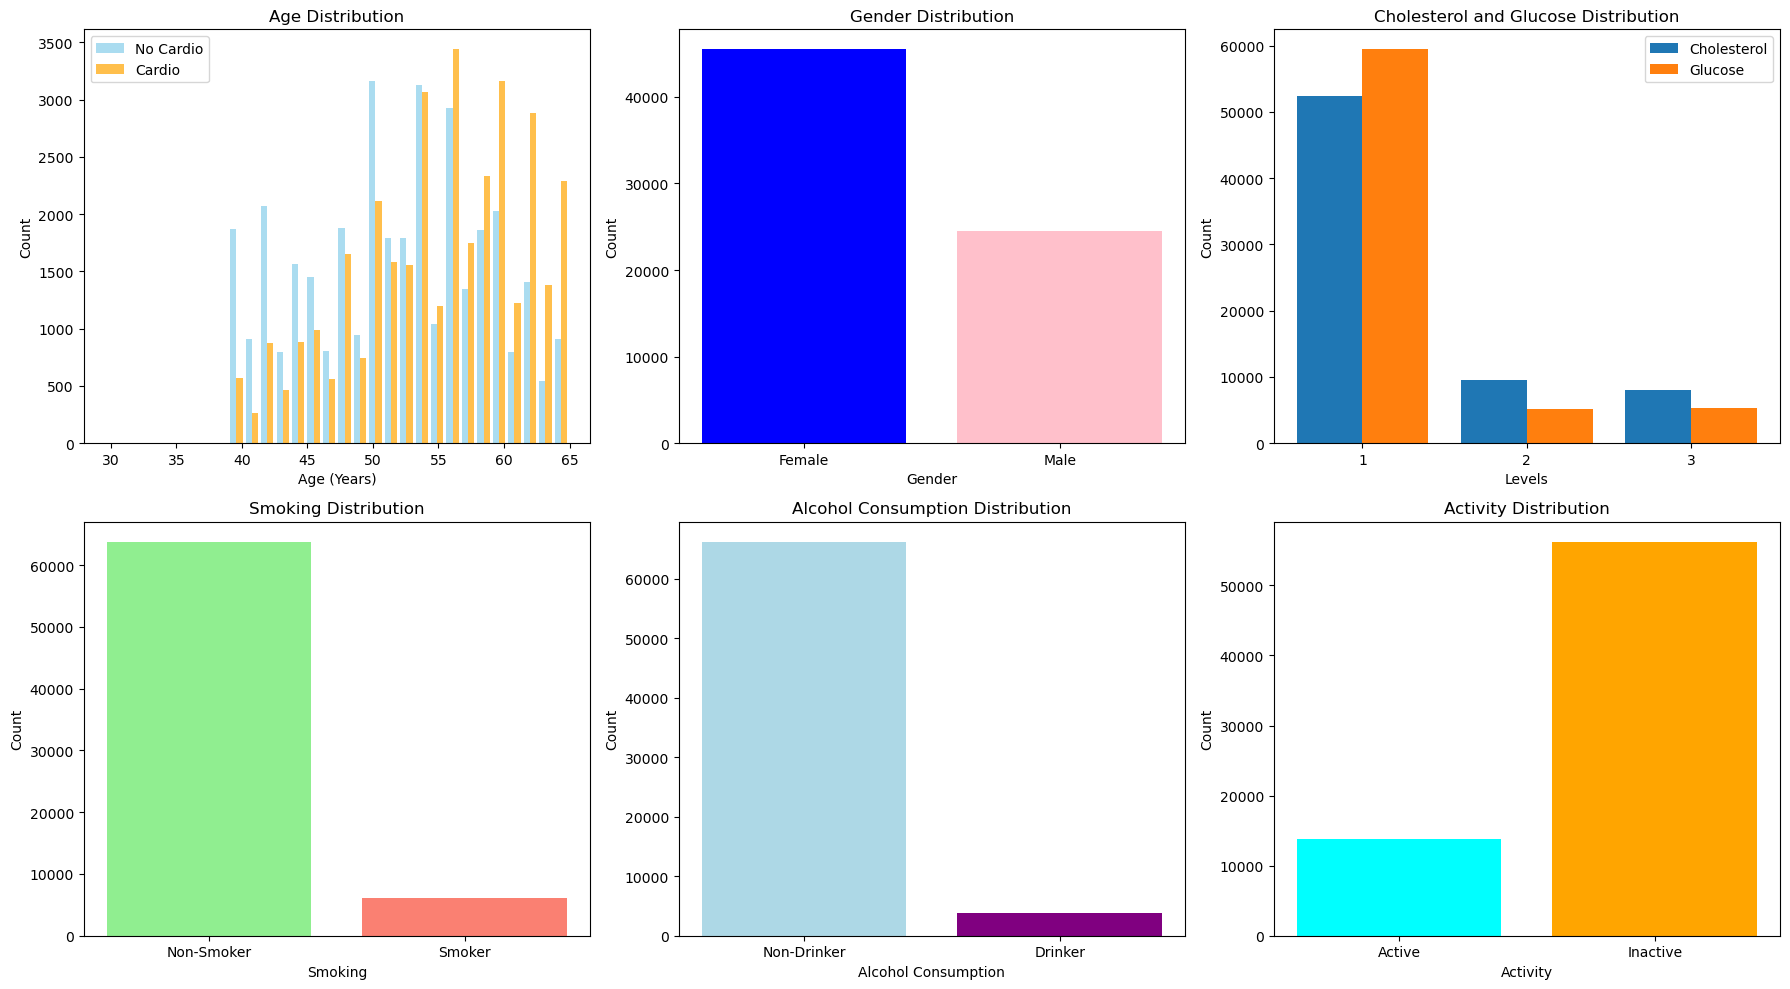

In [5]:
# Set up the figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Age Distribution
axes[0, 0].hist([data[data['cardio'] == 0]['age_years'], data[data['cardio'] == 1]['age_years']],
                bins=30, color=['skyblue', 'orange'], alpha=0.7, label=['No Cardio', 'Cardio'])
axes[0, 0].set_title("Age Distribution")
axes[0, 0].set_xlabel("Age (Years)")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend()

# Gender Distribution
gender_counts = data['gender'].value_counts()
axes[0, 1].bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
axes[0, 1].set_title("Gender Distribution")
axes[0, 1].set_xlabel("Gender")
axes[0, 1].set_ylabel("Count")
axes[0, 1].set_xticks(gender_counts.index)
axes[0, 1].set_xticklabels(['Female', 'Male'])

# Cholesterol and Glucose Distribution
cholesterol_counts = data['cholesterol'].value_counts()
gluc_counts = data['gluc'].value_counts()
axes[0, 2].bar(cholesterol_counts.index - 0.2, cholesterol_counts.values, width=0.4, label='Cholesterol')
axes[0, 2].bar(gluc_counts.index + 0.2, gluc_counts.values, width=0.4, label='Glucose')
axes[0, 2].set_title("Cholesterol and Glucose Distribution")
axes[0, 2].set_xlabel("Levels")
axes[0, 2].set_ylabel("Count")
axes[0, 2].set_xticks(cholesterol_counts.index)
axes[0, 2].legend()

# Smoking, Alcohol Consumption, and Activity Distribution
smoke_counts = data['smoke'].value_counts()
alco_counts = data['alco'].value_counts()
active_counts = data['active'].value_counts()
axes[1, 0].bar(smoke_counts.index, smoke_counts.values, color=['lightgreen', 'salmon'])
axes[1, 0].set_title("Smoking Distribution")
axes[1, 0].set_xlabel("Smoking")
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_xticks(smoke_counts.index)
axes[1, 0].set_xticklabels(['Non-Smoker', 'Smoker'])

axes[1, 1].bar(alco_counts.index, alco_counts.values, color=['lightblue', 'purple'])
axes[1, 1].set_title("Alcohol Consumption Distribution")
axes[1, 1].set_xlabel("Alcohol Consumption")
axes[1, 1].set_ylabel("Count")
axes[1, 1].set_xticks(alco_counts.index)
axes[1, 1].set_xticklabels(['Non-Drinker', 'Drinker'])

axes[1, 2].bar(active_counts.index, active_counts.values, color=['orange', 'cyan'])
axes[1, 2].set_title("Activity Distribution")
axes[1, 2].set_xlabel("Activity")
axes[1, 2].set_ylabel("Count")
axes[1, 2].set_xticks(active_counts.index)
axes[1, 2].set_xticklabels(['Inactive', 'Active'])

plt.tight_layout()
plt.show()

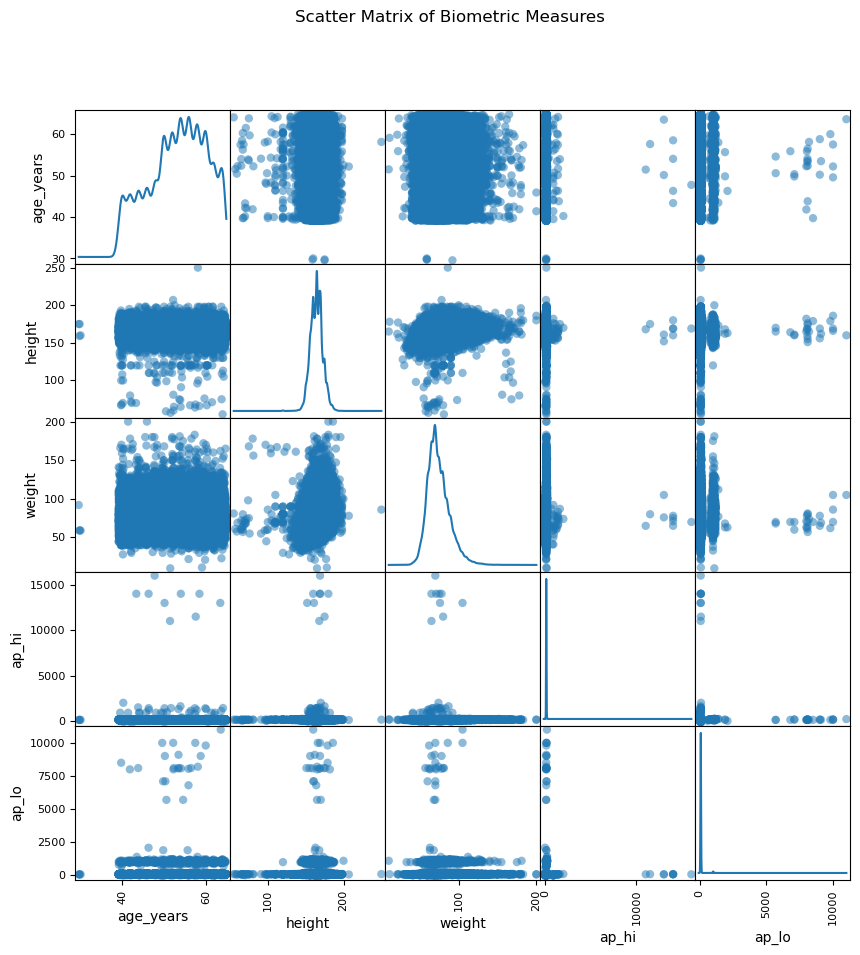

In [6]:
# Select a subset of columns for the scatter matrix
columns_to_plot = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']

# Create scatter matrix using Matplotlib
scatter_matrix(data[columns_to_plot], alpha=0.5, figsize=(10, 10), diagonal='kde', marker='o')

plt.suptitle("Scatter Matrix of Biometric Measures")
plt.show()